In [12]:
train_path = "dataset/train"
val_path = "dataset/val"

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [14]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics = ['accuracy'])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [16]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
'dataset/train',
target_size = (224,224),
batch_size = 16,
class_mode = 'binary'
)

Found 320 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1}

In [19]:
validation_generator = train_datagen.flow_from_directory(
'dataset/val',
target_size = (224,224),
batch_size = 16,
class_mode = 'binary'
)

Found 72 images belonging to 2 classes.


In [20]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\kaavi\AppData\Local\Temp\ipykernel_15124\430255416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.8896 - accuracy: 0.5547 - val_loss: 0.6792 - val_accuracy: 0.8438
Epoch 2/10
8/8 [==============================] - 12s 1s/step - loss: 0.6531 - accuracy: 0.5938 - val_loss: 0.6207 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.4655 - accuracy: 0.8125 - val_loss: 0.3963 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.5029 - accuracy: 0.7500 - val_loss: 0.3589 - val_accuracy: 0.8750
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.3541 - accuracy: 0.8906 - val_loss: 0.4067 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2928 - accuracy: 0.8672 - val_loss: 0.1162 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2935 - accuracy: 0.9062 - val_loss: 0.1595 - val_accuracy: 0.9375
Epoch 8/10
8/8 [==================

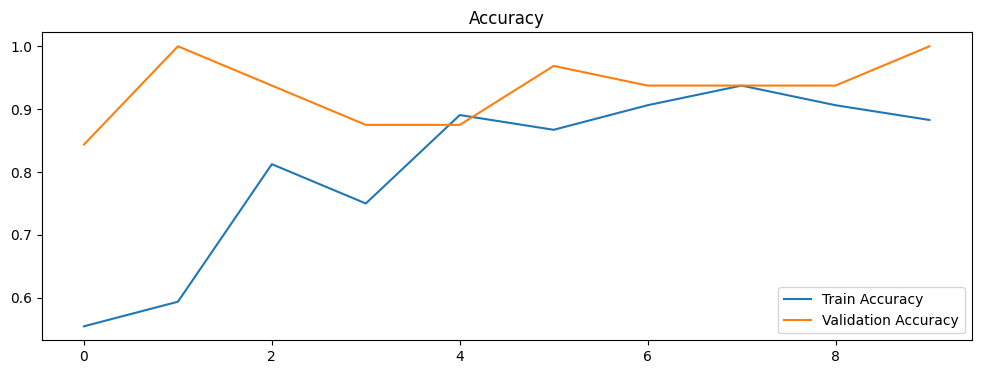

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

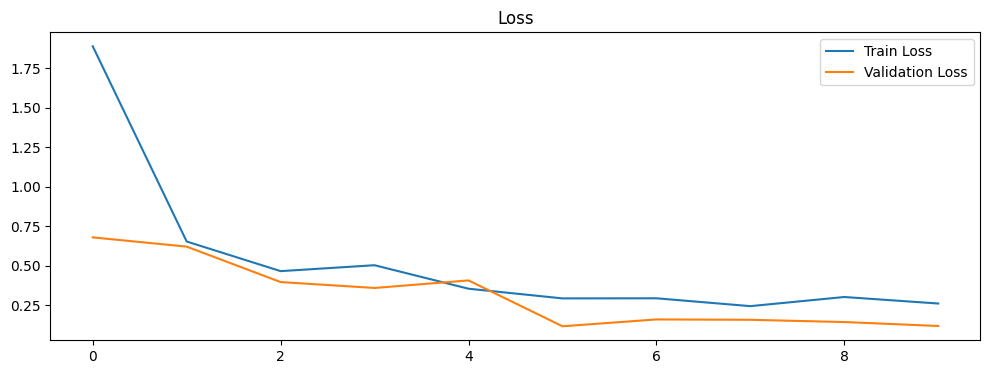

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()